In [1]:
# Baseline MLP for MNIST dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

import glob
from PIL import Image

<h1>MNIST</h1>

<h3>Model 1</h3>

In [8]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



model = Sequential()
model.add(Conv2D(32, (3, 3),strides= 1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 18s 15ms/step - loss: 0.2581 - accuracy: 0.9295 - val_loss: 0.1051 - val_accuracy: 0.9687
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0851 - accuracy: 0.9750 - val_loss: 0.0653 - val_accuracy: 0.9810
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0547 - val_accuracy: 0.9808
Epoch 4/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0425 - accuracy: 0.9876 - val_loss: 0.0787 - val_accuracy: 0.9743
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0345 - accuracy: 0.9898 - val_loss: 0.0448 - val_accuracy: 0.9845
Epoch 6/10
300/300 [==============================] - 4s 15ms/step - loss: 0.0244 - accuracy: 0.9931 - val_loss: 0.0516 - val_accuracy: 0.9837
Epoch 7/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0447 - val_accuracy: 0.985

<h3>Model 2</h3>

In [9]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



model = Sequential()
model.add(Conv2D(16, (3, 3), strides= 1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(Conv2D(32, (3, 3), strides= 1, padding="valid", activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 7s 20ms/step - loss: 0.2784 - accuracy: 0.9165 - val_loss: 0.0868 - val_accuracy: 0.9717
Epoch 2/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0719 - accuracy: 0.9782 - val_loss: 0.0505 - val_accuracy: 0.9827
Epoch 3/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0467 - val_accuracy: 0.9849
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0469 - val_accuracy: 0.9831
Epoch 5/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0683 - val_accuracy: 0.9785
Epoch 6/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0372 - val_accuracy: 0.9873
Epoch 7/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0388 - val_accuracy: 0.9878

<h3>Model 3</h3>

In [10]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



model = Sequential()
model.add(Conv2D(16, (5, 5), strides= 1, padding="same", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(Conv2D(32, (7, 7), strides= 1, padding="same", activation='relu', data_format='channels_first'))
model.add(Conv2D(16, (7, 7), strides= 1, padding="same", activation='relu', data_format='channels_first'))
model.add(Conv2D(8, (7, 7), strides= 1, padding="same", activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 34s 104ms/step - loss: 0.2264 - accuracy: 0.9290 - val_loss: 0.0561 - val_accuracy: 0.9817
Epoch 2/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 3/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 4/10
300/300 [==============================] - 30s 99ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0432 - val_accuracy: 0.9868
Epoch 5/10
300/300 [==============================] - 29s 97ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0413 - val_accuracy: 0.9855
Epoch 6/10
300/300 [==============================] - 30s 101ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 7/10
300/300 [==============================] - 30s 101ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0389 - val_accu

<h3>Model 4</h3>

In [12]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# Encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



model = Sequential()
model.add(Conv2D(16, (5, 5), strides= 2, padding="same", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(Conv2D(32, (7, 7), strides= 2, padding="same", activation='relu', data_format='channels_first'))
model.add(Conv2D(16, (7, 7), strides= 2, padding="same", activation='relu', data_format='channels_first'))
model.add(Conv2D(8, (7, 7), strides= 2, padding="same", activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 6s 15ms/step - loss: 0.5459 - accuracy: 0.8254 - val_loss: 0.1800 - val_accuracy: 0.9458
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1399 - accuracy: 0.9590 - val_loss: 0.1080 - val_accuracy: 0.9651
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0930 - accuracy: 0.9721 - val_loss: 0.0702 - val_accuracy: 0.9754
Epoch 4/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.0616 - val_accuracy: 0.9793
Epoch 5/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0716 - val_accuracy: 0.9779
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0524 - val_accuracy: 0.9831
Epoch 7/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0480 - val_accuracy: 0.9830

<h1>DOGS</h1>

<h3>Import the images</h3>

In [2]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Load data
X =[]
Y =[]

for filename in glob.glob('../lab7/pre/cockerSpaniel/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(0)
    
for filename in glob.glob('../lab7/pre/collie/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(1)

for filename in glob.glob('../lab7/pre/englishSpringer/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(2) 
    
for filename in glob.glob('../lab7/pre/germanShepherd/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(3)

for filename in glob.glob('../lab7/pre/goldenRetriever/*.jpg'):
    im=Image.open(filename)
    arr = np.array(im)
    X.append(arr)
    Y.append(4)

<h3>Process the images for the DANN</h3>

In [3]:
# Convert to NP array
X = np.array(X)


# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], 1, 28, 28).astype('float32')

# Normalize the data
X = X /255

# Encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]


Y = tf.keras.utils.to_categorical(Y)
num_classes = Y.shape[1]

<h3>Model 1</h3>

Epoch 1/20
11/11 [==============================] - 1s 49ms/step - loss: 1.6148 - acc: 0.2186 - val_loss: 1.5904 - val_acc: 0.2383
Epoch 2/20
11/11 [==============================] - 0s 16ms/step - loss: 1.5765 - acc: 0.3133 - val_loss: 1.5648 - val_acc: 0.2773
Epoch 3/20
11/11 [==============================] - 0s 13ms/step - loss: 1.5157 - acc: 0.3462 - val_loss: 1.5129 - val_acc: 0.3164
Epoch 4/20
11/11 [==============================] - 0s 13ms/step - loss: 1.4513 - acc: 0.3714 - val_loss: 1.4891 - val_acc: 0.3203
Epoch 5/20
11/11 [==============================] - 0s 13ms/step - loss: 1.3766 - acc: 0.3946 - val_loss: 1.4628 - val_acc: 0.3750
Epoch 6/20
11/11 [==============================] - 0s 11ms/step - loss: 1.3652 - acc: 0.4043 - val_loss: 1.4554 - val_acc: 0.3672
Epoch 7/20
11/11 [==============================] - 0s 13ms/step - loss: 1.3202 - acc: 0.4545 - val_loss: 1.4313 - val_acc: 0.3828
Epoch 8/20
11/11 [==============================] - 0s 13ms/step - loss: 1.2634 - a

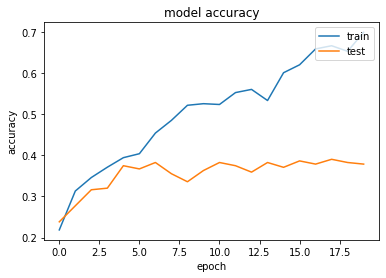

In [26]:
modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=20, batch_size=50, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 2</h3>

Epoch 1/20
11/11 [==============================] - 1s 44ms/step - loss: 1.6138 - acc: 0.2012 - val_loss: 1.6082 - val_acc: 0.1875
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 1.6009 - acc: 0.2205 - val_loss: 1.6005 - val_acc: 0.2734
Epoch 3/20
11/11 [==============================] - 0s 10ms/step - loss: 1.5813 - acc: 0.2708 - val_loss: 1.5563 - val_acc: 0.2695
Epoch 4/20
11/11 [==============================] - 0s 9ms/step - loss: 1.5353 - acc: 0.3095 - val_loss: 1.4873 - val_acc: 0.3242
Epoch 5/20
11/11 [==============================] - 0s 9ms/step - loss: 1.4578 - acc: 0.3462 - val_loss: 1.4579 - val_acc: 0.3477
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 1.4266 - acc: 0.3385 - val_loss: 1.4655 - val_acc: 0.3906
Epoch 7/20
11/11 [==============================] - 0s 10ms/step - loss: 1.3966 - acc: 0.3791 - val_loss: 1.4160 - val_acc: 0.3984
Epoch 8/20
11/11 [==============================] - 0s 13ms/step - loss: 1.3511 - acc: 

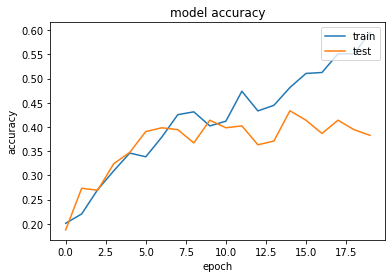

In [27]:
modelC = Sequential()
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dense(256, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=20, batch_size=50, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 3</h3>

Epoch 1/50
2/2 [==============================] - 2s 796ms/step - loss: 1.6115 - acc: 0.1876 - val_loss: 1.6095 - val_acc: 0.1875
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 1.6087 - acc: 0.2147 - val_loss: 1.6087 - val_acc: 0.1914
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 1.6078 - acc: 0.2302 - val_loss: 1.6082 - val_acc: 0.2383
Epoch 4/50
2/2 [==============================] - 0s 58ms/step - loss: 1.6057 - acc: 0.2631 - val_loss: 1.6058 - val_acc: 0.2500
Epoch 5/50
2/2 [==============================] - 0s 59ms/step - loss: 1.6014 - acc: 0.2766 - val_loss: 1.6022 - val_acc: 0.2617
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 1.5965 - acc: 0.2398 - val_loss: 1.5957 - val_acc: 0.2656
Epoch 7/50
2/2 [==============================] - 0s 58ms/step - loss: 1.5851 - acc: 0.2534 - val_loss: 1.5856 - val_acc: 0.2461
Epoch 8/50
2/2 [==============================] - 0s 65ms/step - loss: 1.5707 - acc: 0.2882 - va

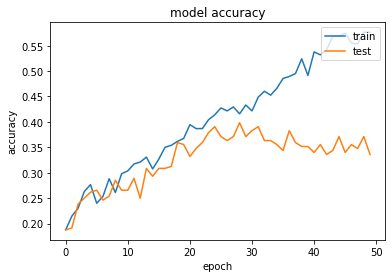

In [34]:
modelC = Sequential()
modelC.add(Conv2D(32, (5, 5), strides=1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(16, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dropout(0.2))
modelC.add(Dense(512, activation='relu'))
modelC.add(Dropout(0.2))
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=50, batch_size=300, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 4</h3>

Epoch 1/50
2/2 [==============================] - 19s 3s/step - loss: 1.6097 - acc: 0.1973 - val_loss: 1.6081 - val_acc: 0.2461
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 1.6083 - acc: 0.2263 - val_loss: 1.6074 - val_acc: 0.2578
Epoch 3/50
2/2 [==============================] - 0s 55ms/step - loss: 1.6060 - acc: 0.2534 - val_loss: 1.6065 - val_acc: 0.2891
Epoch 4/50
2/2 [==============================] - 0s 51ms/step - loss: 1.6054 - acc: 0.2437 - val_loss: 1.6035 - val_acc: 0.2305
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 1.5992 - acc: 0.2534 - val_loss: 1.5993 - val_acc: 0.2266
Epoch 6/50
2/2 [==============================] - 0s 66ms/step - loss: 1.5952 - acc: 0.2727 - val_loss: 1.5915 - val_acc: 0.2773
Epoch 7/50
2/2 [==============================] - 0s 61ms/step - loss: 1.5867 - acc: 0.2901 - val_loss: 1.5786 - val_acc: 0.2812
Epoch 8/50
2/2 [==============================] - 0s 54ms/step - loss: 1.5704 - acc: 0.2998 - val_

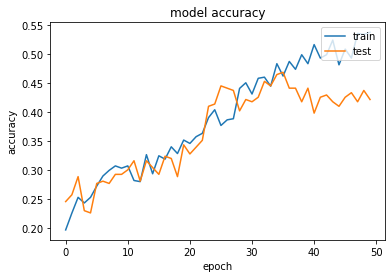

In [4]:
modelC = Sequential()
modelC.add(Conv2D(32, (5, 5), strides=1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(16, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(512, activation='relu'))
modelC.add(Dropout(0.4))
modelC.add(Dense(128, activation='relu'))
modelC.add(Dropout(0.4))
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=50, batch_size=300, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 5</h3>

Epoch 1/50
2/2 [==============================] - 2s 796ms/step - loss: 1.6115 - acc: 0.1876 - val_loss: 1.6095 - val_acc: 0.1875
Epoch 2/50
2/2 [==============================] - 0s 68ms/step - loss: 1.6087 - acc: 0.2147 - val_loss: 1.6087 - val_acc: 0.1914
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 1.6078 - acc: 0.2302 - val_loss: 1.6082 - val_acc: 0.2383
Epoch 4/50
2/2 [==============================] - 0s 58ms/step - loss: 1.6057 - acc: 0.2631 - val_loss: 1.6058 - val_acc: 0.2500
Epoch 5/50
2/2 [==============================] - 0s 59ms/step - loss: 1.6014 - acc: 0.2766 - val_loss: 1.6022 - val_acc: 0.2617
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 1.5965 - acc: 0.2398 - val_loss: 1.5957 - val_acc: 0.2656
Epoch 7/50
2/2 [==============================] - 0s 58ms/step - loss: 1.5851 - acc: 0.2534 - val_loss: 1.5856 - val_acc: 0.2461
Epoch 8/50
2/2 [==============================] - 0s 65ms/step - loss: 1.5707 - acc: 0.2882 - va

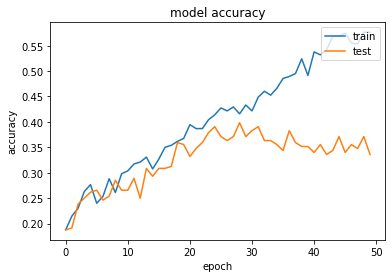

In [ ]:
modelC = Sequential()
modelC.add(Conv2D(32, (5, 5), strides=1, padding="valid", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(64, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Conv2D(16, (3, 3), strides=1, padding="valid", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dropout(0.2))
modelC.add(Dense(512, activation='relu'))
modelC.add(Dropout(0.2))
modelC.add(Dense(64, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=50, batch_size=300, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Model 4</h3>

Epoch 1/50
6/6 [==============================] - 2s 103ms/step - loss: 1.6116 - acc: 0.1934 - val_loss: 1.6095 - val_acc: 0.1875
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 1.6099 - acc: 0.2089 - val_loss: 1.6098 - val_acc: 0.1875
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 1.6092 - acc: 0.2070 - val_loss: 1.6103 - val_acc: 0.1875
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 1.6078 - acc: 0.2128 - val_loss: 1.6103 - val_acc: 0.1875
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 1.6088 - acc: 0.2108 - val_loss: 1.6102 - val_acc: 0.1875
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 1.6073 - acc: 0.2147 - val_loss: 1.6107 - val_acc: 0.1875
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.6086 - acc: 0.2147 - val_loss: 1.6110 - val_acc: 0.1875
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.6078 - acc: 0.2224 - va

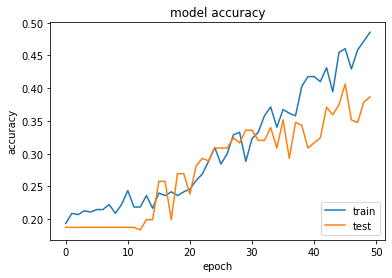

In [17]:
modelC = Sequential()
modelC.add(Conv2D(28, (7, 7), strides=2, padding="same", input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(4, 4), padding="same", data_format='channels_first'))

modelC.add(Conv2D(14, (5, 5), strides=1, padding="same", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="same", data_format='channels_first'))

modelC.add(Conv2D(7, (3, 3), strides=1, padding="same", activation='relu', data_format='channels_first'))
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="same", data_format='channels_first'))

modelC.add(Flatten())
modelC.add(Dense(128, activation='relu'))
modelC.add(Dropout(0.4))
modelC.add(Dense(64, activation='relu'))
modelC.add(Dropout(0.4))
modelC.add(Dense(16, activation='relu'))
modelC.add(Dense(num_classes, activation='softmax'))

modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
history = modelC.fit(X, Y, validation_split=0.33, epochs=50, batch_size=100, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h3>Predicting</h3>

In [46]:
X = []
image_list = []

w = 28
h = 28


for filename in glob.glob('images/*.jpg'):
    im = Image.open(filename)
    image_list.append(im)
    im = im.convert('L')
    im = im.resize((w,h),Image.ANTIALIAS)
    im = np.array(im)
    X.append(im)

# Convert to NP array
X = np.array(X)

# reshape to be [samples][channels][width][height]
X = X.reshape(X.shape[0], 1, 28, 28).astype('float32')

# Normalize the data
X = X /255

In [47]:
image_list

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x134B44D5A00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=277x182 at 0x134B5A38610>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=177x284 at 0x133E50C6BB0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=195x259 at 0x134B44D52B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x13480CE51F0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=196x257 at 0x13480CE52E0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x134A670FB20>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=262x193 at 0x13480CC64C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x133E50E0490>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=194x259 at 0x133E50E0FA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=294x171 at 0x133E50E0F10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x133E50E0AF0>,
 <PI

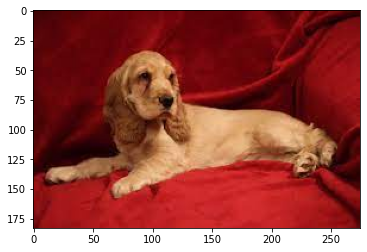

Enlgish Springer


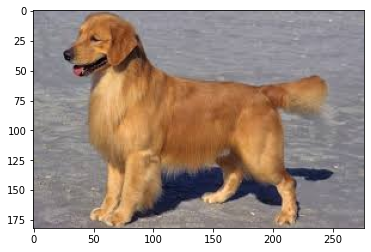

Golden Retriever


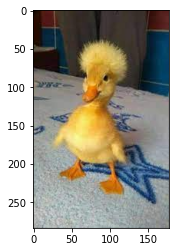

Golden Retriever


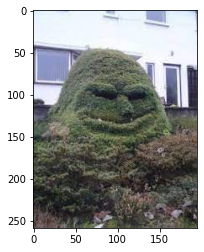

Golden Retriever


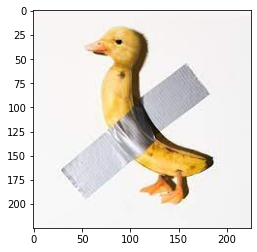

German Shepherd


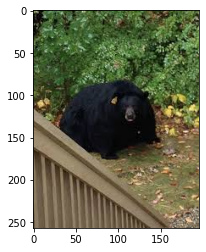

Golden Retriever


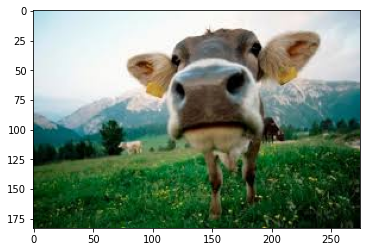

Cocker Spaniel


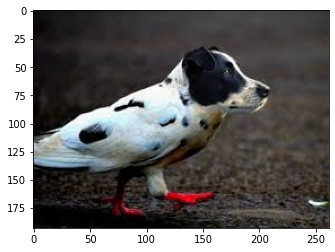

Enlgish Springer


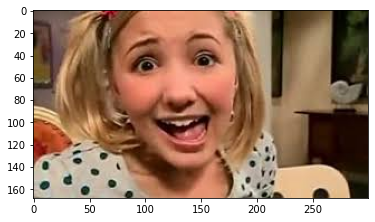

Golden Retriever


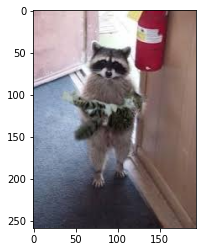

Cocker Spaniel


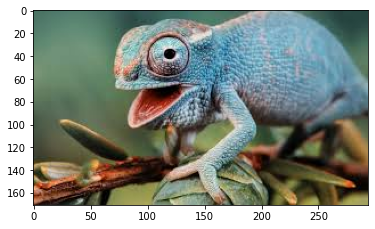

Golden Retriever


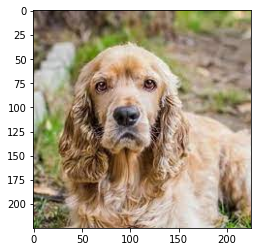

Golden Retriever


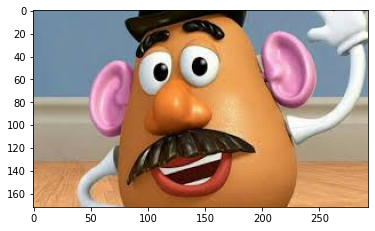

Cocker Spaniel


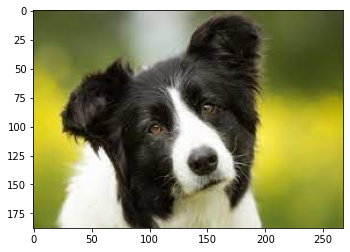

Enlgish Springer


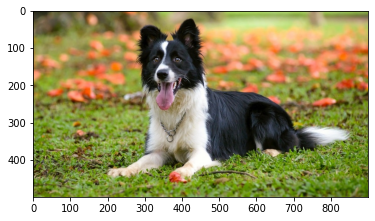

Enlgish Springer


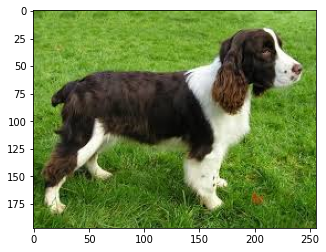

German Shepherd


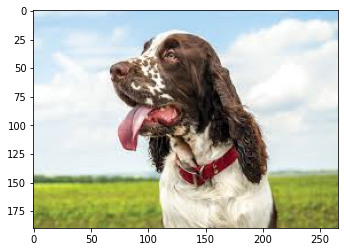

Collie


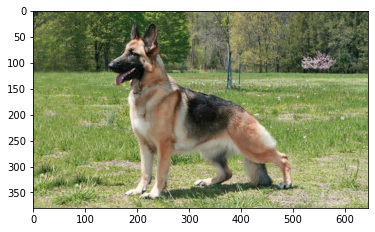

German Shepherd


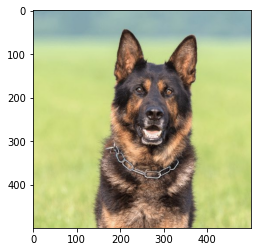

German Shepherd


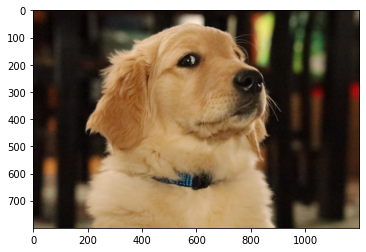

Cocker Spaniel


In [48]:

predictions = modelC.predict_classes(X)
for i, pred in enumerate(predictions):
    plt.imshow(image_list[i], )
    plt.show()
    if pred == 0:
        print("Cocker Spaniel")
    elif pred == 1:
        print("Collie")
    elif pred == 2:
        print("Enlgish Springer")
    elif pred == 3:
        print("German Shepherd")
    elif pred == 4:
        print("Golden Retriever")
